In [12]:
!pip install opendatasets --upgrade --quiet

import opendatasets as od


In [23]:
#dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
#od.download(dataset_url,force=True)


import os
import pandas as pd
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import Dataset
from skimage import io

class fashionDataset(Dataset):
    def __init__(self,csv_file,root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getItem__(self,index):
        img_path = os.path.join(self.root_dir,self.annotations.iloc[index,0])
        #print("path : ",img_path)
        img = io.imread(img_path)
        
        if self.transform:
            image = self.transform(image)
            
        return image


In [16]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import pandas as pd

image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)])

# select training data
df = pd.read_csv('toto.csv', sep = ',', error_bad_lines=False)
#df['id'] = df['id'].astype(str) + ".jpg"

df = df[["id","gender","articleType","year","baseColour"]]

df

,id,gender,articleType,year,baseColour
0,15970.jpg,Men,Shirts,2011.0,Navy Blue
1,39386.jpg,Men,Jeans,2012.0,Blue
2,59263.jpg,Women,Watches,2016.0,Silver
3,21379.jpg,Men,Track Pants,2011.0,Black
4,53759.jpg,Men,Tshirts,2012.0,Grey
...,...,...,...,...,...
44419,17036.jpg,Men,Casual Shoes,2013.0,White
44420,6461.jpg,Men,Flip Flops,2011.0,Red
44421,18842.jpg,Men,Tshirts,2011.0,Blue
44422,46694.jpg,Women,Perfume and Body Mist,2017.0,Blue


In [26]:
#df = (df["articleType"] == "Shirts") & (df["year"] <= 2014.0 ) & (df["year"] <= 2016.0)
df = df.loc[(df["articleType"] == "Flip Flops") ] #& (df["gender"] == "Men") & (df["year"] <= 2014.0 ) & (df["year"] <= 2016.0)
df
df.to_csv("Styles1.csv")
#df.iloc[0][0]

'18653.jpg'

In [27]:
names = [df.iloc[i][0] for i in range(len(df))]
len(names)



914

In [140]:
import os,shutil


shutil.unpack_archive("archive.zip", "archive")

#source = "archive/images/"
#dist = "newFolderIMG/"



In [266]:
dataset = fashionDataset(csv_file = 'styles1.csv', root_dir = 'imagesF', transform = transform)
train_dl = DataLoader(dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)


In [28]:
import os
import os,shutil

source = "archive/images/"
dist = "newFolderIMG/images/"
path = []

for n in names:
   # print("dest",dist+n)
    if os.path.isfile(source+n):
      shutil.move(source+n,dist+n)

#DATA_DIR = './animefacedataset'
DATA_DIR = 'newFolderIMG/'
print(os.listdir(DATA_DIR))
print(os.listdir(DATA_DIR+'/images/')[:10])

['images']
[]


In [29]:
print(os.listdir(DATA_DIR+'/images/')[:10])

['10083.jpg', '10157.jpg', '10166.jpg', '10179.jpg', '10180.jpg', '10616.jpg', '10618.jpg', '10620.jpg', '10622.jpg', '10623.jpg']


In [30]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [31]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [32]:
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [33]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

#print(train_dl.dataset[0][0][0][0])
#denorm(train_dl.dataset[0][0][0][0])

In [35]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

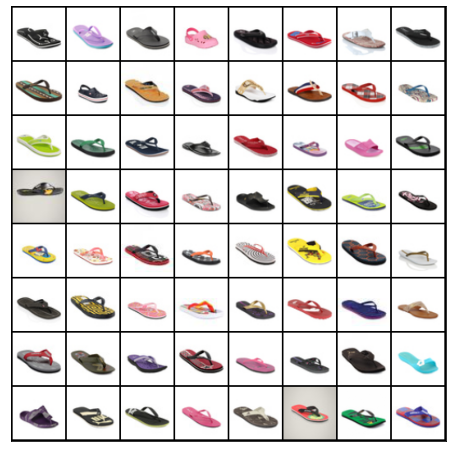

In [36]:
show_batch(train_dl)

In [37]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [38]:
device = get_default_device()
device

device(type='cpu')

In [39]:
train_dl = DeviceDataLoader(train_dl, device)

In [40]:
import torch.nn as nn

In [41]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

In [42]:
latent_size = 128

In [43]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

torch.Size([128, 3, 64, 64])


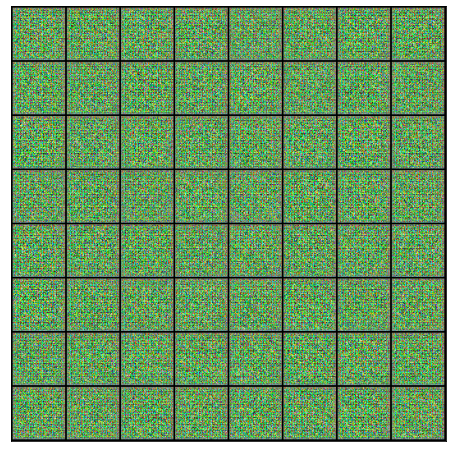

In [44]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

In [45]:
generator = to_device(generator, device)

In [46]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [47]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Update generator weights
    loss.backward()
    opt_g.step()
    
    return loss.item()

In [48]:
from torchvision.utils import save_image

In [49]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [50]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.jpg'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [51]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving generated-images-0000.jpg


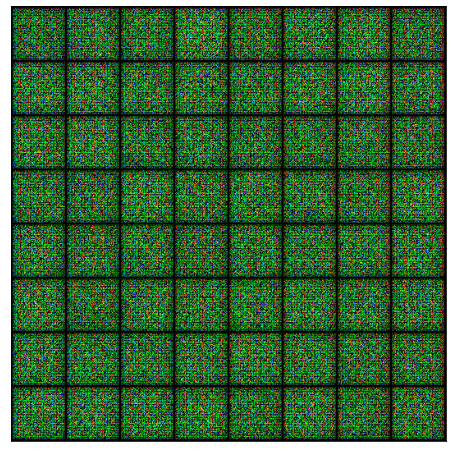

In [52]:
save_samples(0, fixed_latent)

In [53]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [54]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

In [55]:
lr = 0.0002
epochs = 100


In [56]:
history = fit(epochs, lr)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/100], loss_g: 5.2458, loss_d: 0.1321, real_score: 0.9454, fake_score: 0.0610
Saving generated-images-0001.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/100], loss_g: 6.4690, loss_d: 0.0689, real_score: 0.9731, fake_score: 0.0365
Saving generated-images-0002.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/100], loss_g: 6.9963, loss_d: 0.0229, real_score: 0.9958, fake_score: 0.0185
Saving generated-images-0003.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/100], loss_g: 6.9750, loss_d: 0.0225, real_score: 0.9880, fake_score: 0.0102
Saving generated-images-0004.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/100], loss_g: 7.2375, loss_d: 0.0189, real_score: 0.9913, fake_score: 0.0095
Saving generated-images-0005.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/100], loss_g: 7.2970, loss_d: 0.0119, real_score: 0.9961, fake_score: 0.0079
Saving generated-images-0006.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/100], loss_g: 7.7515, loss_d: 0.0095, real_score: 0.9981, fake_score: 0.0076
Saving generated-images-0007.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/100], loss_g: 7.6323, loss_d: 0.0055, real_score: 0.9990, fake_score: 0.0046
Saving generated-images-0008.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/100], loss_g: 7.7532, loss_d: 0.0049, real_score: 0.9993, fake_score: 0.0042
Saving generated-images-0009.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/100], loss_g: 7.7279, loss_d: 0.0044, real_score: 0.9993, fake_score: 0.0037
Saving generated-images-0010.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [11/100], loss_g: 8.1399, loss_d: 0.0045, real_score: 0.9997, fake_score: 0.0041
Saving generated-images-0011.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [12/100], loss_g: 7.9909, loss_d: 0.0047, real_score: 0.9985, fake_score: 0.0032
Saving generated-images-0012.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [13/100], loss_g: 8.1227, loss_d: 0.0044, real_score: 0.9993, fake_score: 0.0037
Saving generated-images-0013.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [14/100], loss_g: 8.2625, loss_d: 0.0053, real_score: 0.9973, fake_score: 0.0025
Saving generated-images-0014.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [15/100], loss_g: 21.2035, loss_d: 5.1862, real_score: 1.0000, fake_score: 0.9938
Saving generated-images-0015.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [16/100], loss_g: 9.1973, loss_d: 0.1863, real_score: 0.9648, fake_score: 0.1225
Saving generated-images-0016.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [17/100], loss_g: 11.7900, loss_d: 0.4186, real_score: 0.8960, fake_score: 0.0000
Saving generated-images-0017.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [18/100], loss_g: 4.6452, loss_d: 0.1769, real_score: 0.9027, fake_score: 0.0497
Saving generated-images-0018.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [19/100], loss_g: 6.0693, loss_d: 0.1924, real_score: 0.9798, fake_score: 0.1483
Saving generated-images-0019.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [20/100], loss_g: 5.6133, loss_d: 0.0475, real_score: 0.9786, fake_score: 0.0251
Saving generated-images-0020.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [21/100], loss_g: 5.8379, loss_d: 0.0822, real_score: 0.9705, fake_score: 0.0493
Saving generated-images-0021.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [22/100], loss_g: 2.5808, loss_d: 0.3538, real_score: 0.7966, fake_score: 0.0993
Saving generated-images-0022.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [23/100], loss_g: 1.4050, loss_d: 0.5082, real_score: 0.7567, fake_score: 0.1832
Saving generated-images-0023.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [24/100], loss_g: 4.1471, loss_d: 1.7693, real_score: 0.9411, fake_score: 0.8058
Saving generated-images-0024.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [25/100], loss_g: 2.6722, loss_d: 0.5439, real_score: 0.6643, fake_score: 0.1178
Saving generated-images-0025.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [26/100], loss_g: 1.2044, loss_d: 1.2264, real_score: 0.3390, fake_score: 0.0695
Saving generated-images-0026.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [27/100], loss_g: 3.6266, loss_d: 0.9152, real_score: 0.9537, fake_score: 0.5669
Saving generated-images-0027.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [28/100], loss_g: 3.2891, loss_d: 1.0162, real_score: 0.9384, fake_score: 0.5812
Saving generated-images-0028.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [29/100], loss_g: 1.8655, loss_d: 2.3738, real_score: 0.1053, fake_score: 0.0041
Saving generated-images-0029.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [30/100], loss_g: 1.4203, loss_d: 1.3623, real_score: 0.2934, fake_score: 0.0137
Saving generated-images-0030.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [31/100], loss_g: 1.0442, loss_d: 0.4208, real_score: 0.7575, fake_score: 0.1095
Saving generated-images-0031.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [32/100], loss_g: 3.0758, loss_d: 0.2887, real_score: 0.8278, fake_score: 0.0900
Saving generated-images-0032.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [33/100], loss_g: 2.0799, loss_d: 0.4305, real_score: 0.7274, fake_score: 0.0964
Saving generated-images-0033.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [34/100], loss_g: 3.7876, loss_d: 0.3654, real_score: 0.9469, fake_score: 0.2609
Saving generated-images-0034.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [35/100], loss_g: 1.6898, loss_d: 0.5519, real_score: 0.6873, fake_score: 0.1272
Saving generated-images-0035.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [36/100], loss_g: 3.2306, loss_d: 0.2467, real_score: 0.8795, fake_score: 0.1072
Saving generated-images-0036.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [37/100], loss_g: 2.9214, loss_d: 1.0068, real_score: 0.4032, fake_score: 0.0110
Saving generated-images-0037.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [38/100], loss_g: 0.8527, loss_d: 1.2887, real_score: 0.3936, fake_score: 0.1428
Saving generated-images-0038.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [39/100], loss_g: 1.2437, loss_d: 0.8958, real_score: 0.5539, fake_score: 0.1806
Saving generated-images-0039.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [40/100], loss_g: 2.2595, loss_d: 0.9276, real_score: 0.7164, fake_score: 0.4043
Saving generated-images-0040.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [41/100], loss_g: 2.9854, loss_d: 1.1177, real_score: 0.3949, fake_score: 0.0272
Saving generated-images-0041.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [42/100], loss_g: 3.3216, loss_d: 0.7552, real_score: 0.8197, fake_score: 0.3994
Saving generated-images-0042.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [43/100], loss_g: 2.3388, loss_d: 0.5943, real_score: 0.6301, fake_score: 0.0380
Saving generated-images-0043.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [44/100], loss_g: 3.7119, loss_d: 0.4912, real_score: 0.9094, fake_score: 0.3088
Saving generated-images-0044.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [45/100], loss_g: 4.0903, loss_d: 0.4305, real_score: 0.9088, fake_score: 0.2687
Saving generated-images-0045.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [46/100], loss_g: 1.4362, loss_d: 0.4839, real_score: 0.7776, fake_score: 0.1838
Saving generated-images-0046.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [47/100], loss_g: 2.0351, loss_d: 0.4261, real_score: 0.8055, fake_score: 0.1722
Saving generated-images-0047.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [48/100], loss_g: 3.0838, loss_d: 0.3564, real_score: 0.8411, fake_score: 0.1483
Saving generated-images-0048.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [49/100], loss_g: 3.1003, loss_d: 0.9748, real_score: 0.9660, fake_score: 0.5822
Saving generated-images-0049.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [50/100], loss_g: 2.3371, loss_d: 1.0188, real_score: 0.4118, fake_score: 0.0331
Saving generated-images-0050.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [51/100], loss_g: 1.7030, loss_d: 2.0299, real_score: 0.1611, fake_score: 0.0120
Saving generated-images-0051.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [52/100], loss_g: 1.6788, loss_d: 0.7205, real_score: 0.6422, fake_score: 0.1677
Saving generated-images-0052.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [53/100], loss_g: 0.9999, loss_d: 1.3305, real_score: 0.3360, fake_score: 0.0289
Saving generated-images-0053.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [54/100], loss_g: 0.9852, loss_d: 2.8508, real_score: 0.0770, fake_score: 0.0037
Saving generated-images-0054.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [55/100], loss_g: 1.2303, loss_d: 0.8184, real_score: 0.5632, fake_score: 0.1512
Saving generated-images-0055.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [56/100], loss_g: 2.6028, loss_d: 0.5282, real_score: 0.7421, fake_score: 0.1794
Saving generated-images-0056.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [57/100], loss_g: 2.7185, loss_d: 0.3397, real_score: 0.8251, fake_score: 0.1275
Saving generated-images-0057.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [58/100], loss_g: 2.0454, loss_d: 0.5367, real_score: 0.6668, fake_score: 0.0860
Saving generated-images-0058.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [59/100], loss_g: 3.9137, loss_d: 0.3662, real_score: 0.8172, fake_score: 0.1450
Saving generated-images-0059.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [60/100], loss_g: 1.3534, loss_d: 0.5340, real_score: 0.7167, fake_score: 0.1587
Saving generated-images-0060.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [61/100], loss_g: 2.1633, loss_d: 1.0187, real_score: 0.8281, fake_score: 0.5292
Saving generated-images-0061.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [62/100], loss_g: 0.6024, loss_d: 0.7633, real_score: 0.6311, fake_score: 0.1804
Saving generated-images-0062.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [63/100], loss_g: 0.8153, loss_d: 0.8187, real_score: 0.5978, fake_score: 0.2114
Saving generated-images-0063.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [64/100], loss_g: 0.1026, loss_d: 1.8975, real_score: 0.2253, fake_score: 0.0629
Saving generated-images-0064.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [65/100], loss_g: 2.6132, loss_d: 0.4128, real_score: 0.8376, fake_score: 0.2017
Saving generated-images-0065.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [66/100], loss_g: 2.1982, loss_d: 0.7266, real_score: 0.6075, fake_score: 0.1733
Saving generated-images-0066.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [67/100], loss_g: 0.6201, loss_d: 0.8128, real_score: 0.5944, fake_score: 0.2130
Saving generated-images-0067.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [68/100], loss_g: 1.8753, loss_d: 0.9734, real_score: 0.4209, fake_score: 0.0385
Saving generated-images-0068.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [69/100], loss_g: 3.4428, loss_d: 0.7309, real_score: 0.9385, fake_score: 0.4435
Saving generated-images-0069.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [70/100], loss_g: 0.7961, loss_d: 0.8235, real_score: 0.5796, fake_score: 0.1189
Saving generated-images-0070.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [71/100], loss_g: 0.7076, loss_d: 0.9375, real_score: 0.4990, fake_score: 0.1154
Saving generated-images-0071.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [72/100], loss_g: 2.2024, loss_d: 0.6893, real_score: 0.5477, fake_score: 0.0481
Saving generated-images-0072.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [73/100], loss_g: 4.3546, loss_d: 0.5574, real_score: 0.9560, fake_score: 0.3820
Saving generated-images-0073.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [74/100], loss_g: 2.7353, loss_d: 0.9410, real_score: 0.4289, fake_score: 0.0025
Saving generated-images-0074.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [75/100], loss_g: 4.4578, loss_d: 1.2047, real_score: 0.3584, fake_score: 0.0033
Saving generated-images-0075.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [76/100], loss_g: 4.9278, loss_d: 0.2654, real_score: 0.9077, fake_score: 0.1484
Saving generated-images-0076.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [77/100], loss_g: 0.7378, loss_d: 1.2760, real_score: 0.3515, fake_score: 0.0536
Saving generated-images-0077.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [78/100], loss_g: 0.3332, loss_d: 3.9572, real_score: 0.0253, fake_score: 0.0841
Saving generated-images-0078.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [79/100], loss_g: 0.9286, loss_d: 1.1429, real_score: 0.4199, fake_score: 0.1801
Saving generated-images-0079.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [80/100], loss_g: 0.2814, loss_d: 2.0550, real_score: 0.1988, fake_score: 0.1363
Saving generated-images-0080.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [81/100], loss_g: 0.3218, loss_d: 2.9223, real_score: 0.0945, fake_score: 0.2102
Saving generated-images-0081.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [82/100], loss_g: 0.9270, loss_d: 1.1809, real_score: 0.4348, fake_score: 0.2080
Saving generated-images-0082.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [83/100], loss_g: 2.8451, loss_d: 0.3751, real_score: 0.8559, fake_score: 0.1882
Saving generated-images-0083.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [84/100], loss_g: 2.7339, loss_d: 0.4674, real_score: 0.8773, fake_score: 0.2720
Saving generated-images-0084.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [85/100], loss_g: 0.6933, loss_d: 0.7281, real_score: 0.5552, fake_score: 0.0867
Saving generated-images-0085.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [86/100], loss_g: 3.7361, loss_d: 0.2814, real_score: 0.9119, fake_score: 0.1642
Saving generated-images-0086.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [87/100], loss_g: 0.9893, loss_d: 1.6547, real_score: 0.2710, fake_score: 0.0801
Saving generated-images-0087.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [88/100], loss_g: 3.3914, loss_d: 0.2675, real_score: 0.8737, fake_score: 0.1181
Saving generated-images-0088.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [89/100], loss_g: 0.7557, loss_d: 2.5013, real_score: 0.1855, fake_score: 0.3677
Saving generated-images-0089.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [90/100], loss_g: 0.5073, loss_d: 1.5781, real_score: 0.2801, fake_score: 0.1179
Saving generated-images-0090.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [91/100], loss_g: 0.8385, loss_d: 1.5642, real_score: 0.2898, fake_score: 0.0659
Saving generated-images-0091.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [92/100], loss_g: 3.6278, loss_d: 0.4934, real_score: 0.8069, fake_score: 0.2242
Saving generated-images-0092.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [93/100], loss_g: 1.6361, loss_d: 1.5051, real_score: 0.2827, fake_score: 0.0352
Saving generated-images-0093.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [94/100], loss_g: 0.4003, loss_d: 2.1896, real_score: 0.1709, fake_score: 0.0475
Saving generated-images-0094.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [95/100], loss_g: 3.4766, loss_d: 0.1827, real_score: 0.8966, fake_score: 0.0659
Saving generated-images-0095.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [96/100], loss_g: 4.0576, loss_d: 0.1127, real_score: 0.9489, fake_score: 0.0576
Saving generated-images-0096.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [97/100], loss_g: 1.0982, loss_d: 5.8277, real_score: 0.0049, fake_score: 0.0522
Saving generated-images-0097.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [98/100], loss_g: 0.9714, loss_d: 1.0162, real_score: 0.5474, fake_score: 0.2485
Saving generated-images-0098.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [99/100], loss_g: 3.5931, loss_d: 0.4538, real_score: 0.8316, fake_score: 0.1901
Saving generated-images-0099.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [100/100], loss_g: 4.5600, loss_d: 0.1096, real_score: 0.9213, fake_score: 0.0262
Saving generated-images-0100.jpg
